Data Pre-Processing and Cleaning

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Mounting into drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path of the dataset file already present in the drive
file_path = '/content/drive/MyDrive/295B_Project_RecommendationSystem/Coursera.csv'

In [4]:
# Command to read the csv file
df = pd.read_csv(file_path)

In [5]:
df.head(10)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
5,Building Test Automation Framework using Selen...,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/building-test-a...,Selenium is one of the most widely used functi...,maintenance test case test automation scree...
6,Doing Business in China Capstone,The Chinese University of Hong Kong,Advanced,3.3,https://www.coursera.org/learn/doing-business-...,Doing Business in China Capstone enables you t...,marketing plan Planning Marketing consumpti...
7,"Programming Languages, Part A",University of Washington,Intermediate,4.9,https://www.coursera.org/learn/programming-lan...,This course is an introduction to the basic co...,inference ml (programming language) higher-o...
8,The Roles and Responsibilities of Nonprofit Bo...,The State University of New York,Intermediate,4.3,https://www.coursera.org/learn/nonprofit-gov-2,This course provides a more in-depth look at t...,Planning Peer Review fundraising strategic ...
9,Business Russian Communication. Part 3,Saint Petersburg State University,Intermediate,Not Calibrated,https://www.coursera.org/learn/business-russia...,Russian is considered to be one of the most di...,Russian market (economics) tax exemption co...


In [6]:
# A major step is to check for duplicate rows (if any). If there exists, drop them
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 98


Dropping duplicate rows

In [7]:
# Drop duplicate rows
df = df.drop_duplicates()

# Reset the index
df.reset_index(drop=True, inplace=True)

In [8]:
# Display the first 5 rows of the cleaned dataset
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


Checking if there is any whitespaces in the dataset and trimming as needed

In [9]:
# Loop through all string columns and trim leading whitespaces
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column contains string values
        df[col] = df[col].str.strip() 

<ipython-input-9-b584fba1ad42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.strip()


In [10]:
df.head(10)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
5,Building Test Automation Framework using Selen...,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/building-test-a...,Selenium is one of the most widely used functi...,maintenance test case test automation scree...
6,Doing Business in China Capstone,The Chinese University of Hong Kong,Advanced,3.3,https://www.coursera.org/learn/doing-business-...,Doing Business in China Capstone enables you t...,marketing plan Planning Marketing consumpti...
7,"Programming Languages, Part A",University of Washington,Intermediate,4.9,https://www.coursera.org/learn/programming-lan...,This course is an introduction to the basic co...,inference ml (programming language) higher-o...
8,The Roles and Responsibilities of Nonprofit Bo...,The State University of New York,Intermediate,4.3,https://www.coursera.org/learn/nonprofit-gov-2,This course provides a more in-depth look at t...,Planning Peer Review fundraising strategic ...
9,Business Russian Communication. Part 3,Saint Petersburg State University,Intermediate,Not Calibrated,https://www.coursera.org/learn/business-russia...,Russian is considered to be one of the most di...,Russian market (economics) tax exemption co...


Check for missing values if any in the dataset

In [11]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64


In [12]:
#Checking if missing value (if any) exists within a row
has_missing_values = df.isnull().any(axis=1)
row_with_missing_values = df[has_missing_values]

if row_with_missing_values.empty:
    print("No there are no rows with missing values anymore")
else:
    print("Here are rows with missing values:")
    print(row_with_missing_values)

No there are no rows with missing values anymore


In [13]:
# Making a copy of existing dataframe for further investigation
df_copy = df.copy()

In [14]:
# Droping the "University" column as it is not needed for our future consideration
df_copy.drop('University', axis=1, inplace=True)

# Print the updated DataFrame
print(df_copy.head(10))

                                         Course Name Difficulty Level  \
0  Write A Feature Length Screenplay For Film Or ...         Beginner   
1  Business Strategy: Business Model Canvas Analy...         Beginner   
2                      Silicon Thin Film Solar Cells         Advanced   
3                               Finance for Managers     Intermediate   
4       Retrieve Data using Single-Table SQL Queries         Beginner   
5  Building Test Automation Framework using Selen...         Beginner   
6                   Doing Business in China Capstone         Advanced   
7                      Programming Languages, Part A     Intermediate   
8  The Roles and Responsibilities of Nonprofit Bo...     Intermediate   
9             Business Russian Communication. Part 3     Intermediate   

    Course Rating                                         Course URL  \
0             4.8  https://www.coursera.org/learn/write-a-feature...   
1             4.8  https://www.coursera.org/learn/ca

In [15]:
# Just a check for the data types of each column in the dataset
column_data_types = df_copy.dtypes

# Print the data types
print(column_data_types)

Course Name           object
Difficulty Level      object
Course Rating         object
Course URL            object
Course Description    object
Skills                object
dtype: object


In [16]:
# Checking statistics of "Rating" column for further analysis
#Using describe as it usually provides info about count, mean, max, min etc.
column_stats = df_copy['Course Rating'].describe()
print(column_stats)

count     3424
unique      31
top        4.7
freq       707
Name: Course Rating, dtype: object


In [17]:
# Using df.head() earlier caught out attention to the presence of outliers in the dataset with the name "calibrated" hence removing it
column_name = 'Course Rating'  
value_to_remove = 'Not Calibrated'  

# Using boolean mask as they are pretty common to filter a dataframe
mask = df_copy['Course Rating'] == 'Not Calibrated'

# Not including those rows that do not content "Not calibrated"
df_copy_filtered = df_copy[~mask]

# As an alternative, we can restore the original DataFrame with the filtered DataFrame.
df_copy = df_copy[~mask]

In [18]:
df_copy.head(20)

,Course Name,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
5,Building Test Automation Framework using Selen...,Beginner,4.7,https://www.coursera.org/learn/building-test-a...,Selenium is one of the most widely used functi...,maintenance test case test automation scree...
6,Doing Business in China Capstone,Advanced,3.3,https://www.coursera.org/learn/doing-business-...,Doing Business in China Capstone enables you t...,marketing plan Planning Marketing consumpti...
7,"Programming Languages, Part A",Intermediate,4.9,https://www.coursera.org/learn/programming-lan...,This course is an introduction to the basic co...,inference ml (programming language) higher-o...
8,The Roles and Responsibilities of Nonprofit Bo...,Intermediate,4.3,https://www.coursera.org/learn/nonprofit-gov-2,This course provides a more in-depth look at t...,Planning Peer Review fundraising strategic ...
10,Agile Projects: Developing Tasks with Taiga,Beginner,4,https://www.coursera.org/learn/developing-agil...,"By the end of this guided project, you will be...",project modeling Project Management agile m...


In [19]:
#Converting the course rating values from string to float as it contains decimal values 
#Matches any character that is not a digit/decimal and replacement string is '' to remove any non-numeric values
df_copy['Course Rating'] = df_copy['Course Rating'].str.replace('[^\d.]', '', regex=True).astype(float)

<ipython-input-19-1a19a46b4505>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Course Rating'] = df_copy['Course Rating'].str.replace('[^\d.]', '', regex=True).astype(float)


Performing outlier detection on a column "Course Rating". For each value in the rating column, we will calculate Z score. 

In [20]:
# Outlier detection using Z score
#Subtracting mean of column from each value in "Rating" & dividing by Standard deviation
z_scores = (df_copy['Course Rating'] - df_copy['Course Rating'].mean()) / df_copy['Course Rating'].std()
threshold = 3
#Creating a new dataframe to store outliers and replacing them with median
outliers_zscore = df_copy['Course Rating'][np.abs(z_scores) > threshold]

# Identifying values with Z score > threshold (3 in our case)
median = df_copy['Course Rating'].median()
df_copy['Course Rating'][np.abs(z_scores) > threshold] = median

# Computing Inter Quartile Range (IQR) for course rating column
#identifies any values that fall outside a range of 1.5 times the IQR below the 1st  quartile or above the 3rd quartile.
Q1 = df_copy['Course Rating'].quantile(0.25)
Q3 = df_copy['Course Rating'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers_iqr = df_copy['Course Rating'][(df_copy['Course Rating'] < (Q1 - threshold * IQR)) | (df_copy['Course Rating'] > (Q3 + threshold * IQR))]

# Replace them with the mean value
mean = df_copy['Course Rating'].mean()
df_copy['Course Rating'][(df_copy['Course Rating'] < (Q1 - threshold * IQR)) | (df_copy['Course Rating'] > (Q3 + threshold * IQR))] = mean

<ipython-input-20-83ced4a6e109>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Course Rating'][np.abs(z_scores) > threshold] = median
<ipython-input-20-83ced4a6e109>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Course Rating'][(df_copy['Course Rating'] < (Q1 - threshold * IQR)) | (df_copy['Course Rating'] > (Q3 + threshold * IQR))] = mean


In [21]:
cleaned_df = pd.DataFrame(df_copy)
#Our cleaned dataframe is ready, Save the cleaned DataFrame to a CSV file
cleaned_df.to_csv('cleaned_data.csv', index=False)

Data Visualization

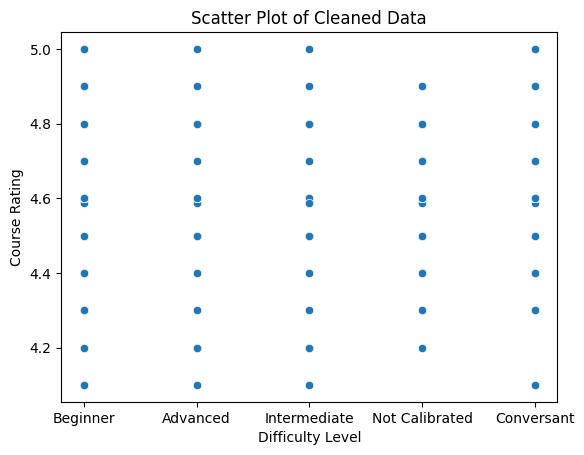

In [22]:
import seaborn as sns

# Plot a scatter plot
sns.scatterplot(x='Difficulty Level', y='Course Rating', data=cleaned_df)

# Add labels and title
plt.xlabel('Difficulty Level')
plt.ylabel('Course Rating')
plt.title('Scatter Plot of Cleaned Data')

# Show the plot
plt.show()

In [23]:
# Specify the column name and the particular value to search for
column_name = 'Difficulty Level'  
value_to_remove = 'Not Calibrated'  

# Create a boolean mask for rows that contain the particular value
mask = df_copy['Difficulty Level'] == 'Not Calibrated'

# Filter the DataFrame to exclude rows that contain the particular value
df_copy_filtered = df_copy[~mask]

# Optionally, you can assign the filtered DataFrame back to the original DataFrame
df_copy = df_copy[~mask]
df_copy.head(20)

,Course Name,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Beginner,4.800000,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Beginner,4.800000,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,Advanced,4.100000,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,Intermediate,4.800000,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Beginner,4.600000,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
5,Building Test Automation Framework using Selen...,Beginner,4.700000,https://www.coursera.org/learn/building-test-a...,Selenium is one of the most widely used functi...,maintenance test case test automation scree...
6,Doing Business in China Capstone,Advanced,4.600000,https://www.coursera.org/learn/doing-business-...,Doing Business in China Capstone enables you t...,marketing plan Planning Marketing consumpti...
7,"Programming Languages, Part A",Intermediate,4.900000,https://www.coursera.org/learn/programming-lan...,This course is an introduction to the basic co...,inference ml (programming language) higher-o...
8,The Roles and Responsibilities of Nonprofit Bo...,Intermediate,4.300000,https://www.coursera.org/learn/nonprofit-gov-2,This course provides a more in-depth look at t...,Planning Peer Review fundraising strategic ...
10,Agile Projects: Developing Tasks with Taiga,Beginner,4.586505,https://www.coursera.org/learn/developing-agil...,"By the end of this guided project, you will be...",project modeling Project Management agile m...


In [24]:
num_rows = df_copy.shape[0]

# Print the total number of rows
print("Total number of rows:", num_rows)

Total number of rows: 3294


In [25]:
cleaned_df = pd.DataFrame(df_copy)

# Save the cleaned DataFrame to a CSV file
cleaned_df.to_csv('cleaned_data.csv', index=False)

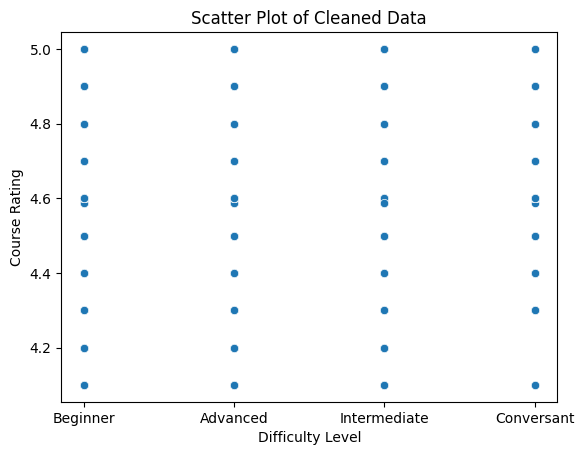

In [26]:
#Scatter plot using seaborn with difficulty level on X axis and Rating on Y axis
import seaborn as sns

# Plot a scatter plot
sns.scatterplot(x='Difficulty Level', y='Course Rating', data=cleaned_df)

# Add labels and title
plt.xlabel('Difficulty Level')
plt.ylabel('Course Rating')
plt.title('Scatter Plot of Cleaned Data')

# Show the plot
plt.show()

CONTENT BASED FILTERING

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  

# Loading the cleaned csv file creater earlier into a dataframe
df = pd.read_csv('/content/cleaned_data.csv')

# Creating a TF-IDF vectorizer with appropriate parameters
tfidf_vectorizer = TfidfVectorizer()

#Fitting the vectorizer object created earlier with the "Skills" column
tfidf_vectorizer.fit(df['Skills'].values.astype('U'))

# Creating a function to get top N similar courses
def get_top_similar_courses(skill, N=5):
    # Step 1: Filter courses wrt to the chosen skill
    filtered_courses = df[df['Skills'].str.contains(skill, case=False)]
    
    if filtered_courses.empty:
        print("Error! No courses find with the skill '{}'".format(skill))
        return None

    # Step 2: Now computing a TF-IDF matrix for the specific filtered courses
    tfidf_matrix = tfidf_vectorizer.transform(filtered_courses['Skills'].values.astype('U'))

    # Step 3: Cosine similarity will be calculated between the filtered courses and every course
    cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Step 4: Getting the index of the filtered course with the highest ratings
    max_rating_index = filtered_courses['Course Rating'].idxmax()
    
    # Step 5: Getting the similarity scores for the filtered course with the highest ratings
    similarity_scores = list(enumerate(cosine_similarities[max_rating_index]))

    # Step 6: Sorting the similarity scores in descending order for better presentation
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Step 7: Extracting the indices of the top N similar courses from the sorted similarity scores
    top_indices = [index for index, _ in similarity_scores[1:N+1]]
    
    # Step 8: Now getting the titles of the top N similar courses using the retrieved indices
    #Using iloc to retrieve rows of filtered courses
    top_courses = filtered_courses['Course Name'].iloc[top_indices]
    
    # Step 9: Getting the course title with the highest ratings
    highest_rated_course = filtered_courses.loc[max_rating_index, 'Course Name']
    
    return highest_rated_course, top_courses




Checking with a skill to test if our Content-based approach works and courses are getting recommended based on skills.

In [28]:
input_skill = "python"
highest_rated_course, similar_courses = get_top_similar_courses(input_skill, N=20)
print("The Course recommendation on content-based filtering with highest ratings for skill '{}':".format(input_skill))
print(highest_rated_course)
print("Below are the Top 20 similar courses for skill '{}' based on skills:".format(input_skill))
print(similar_courses)

The Course recommendation on content-based filtering with highest ratings for skill 'python':
AWS Elastic Beanstalk:Deploy a Python(Flask) Web Application
Below are the Top 20 similar courses for skill 'python' based on skills:
2165       Programming for the Internet of Things Project
1856                    Interfacing with the Raspberry Pi
708             Python Functions, Files, and Dictionaries
2996    Big Data Essentials: HDFS, MapReduce and Spark...
273                                Introduction to Python
1460    Create a Python Application using PyMongo and ...
254               Learn to Program: Crafting Quality Code
1096          The Fundamentals of Computing Capstone Exam
432         Python Project: pillow, tesseract, and opencv
458              Class Creation in Object Oriented Python
531        Build a Simple App in Android Studio with Java
1565                   Learn to Program: The Fundamentals
1959                            Python Data Visualization
1476              

Collaborative Filtering

In [29]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
# Importing Count vectorizer as it is usually used to transform textual data to numerical format
from sklearn.feature_extraction.text import CountVectorizer

# Loading the data already stored and pre-processed
df = pd.read_csv('cleaned_data.csv')

# Creating a collaborative filtering function that accepts two arguements to find top N courses
def get_collaborative_filtering_courses(skill, N=20):
    # Step 1: Filtering the courses with only the specified skill column otherwise print an error 
    filtered_courses = df[df['Skills'].str.contains(skill, case=False)]
    
    if filtered_courses.empty:
        print("Error! There are no courses with chosen skill '{}'".format(skill))
        return None
    
    # Step 2: Computing the cosine similarity between courses based on item-item collaborative filtering
    vectorizer = CountVectorizer()
    #Also converting skills to a matrix using vectorizer inbuilt function
    skill_matrix = vectorizer.fit_transform(filtered_courses['Skills'])
    #Cosine similarity function calculates the similarity between each course w.r.t. skill matrices
    similarity_matrix = cosine_similarity(skill_matrix)
    
    # Step 3: Getting the index of the filtered course with the highest ratings using idxmax()
    #returns index
    max_rating_index = filtered_courses['Course Rating'].idxmax()
    
    # Step 4: Computing the similarity scores for the filtered course with the highest ratings with each course in the df
    similarity_scores = list(enumerate(similarity_matrix[max_rating_index]))

    # Step 5: Sorting the similarity scores in descending order for easier presentation
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Step 6: Extracting the indices of the top N similar courses from the sorted similarity scores
    #getting a list of tuples after slicing based on similarity scores
    top_indices = [index for index, _ in similarity_scores[1:N+1]]
    
    # Step 7: Also getting the titles of the top N similar courses using the retrieved indices
    top_courses = filtered_courses.iloc[top_indices]['Course Name']
    
    # Step 8: Getting the course title with the highest ratings
    highest_rated_course = filtered_courses.loc[max_rating_index, 'Course Name']
    
    return highest_rated_course, top_courses




Checking with a skill to test if our Collaborative Filtering approach works and courses are getting recommended based on skills.

In [30]:
skill = 'python'
top_course, similar_courses = get_collaborative_filtering_courses(skill, N=20)
print("The Collaborative Filtering recommendation with skill '{}': {}".format(skill, top_course))
print("Top 20 similar courses: {}".format(similar_courses.tolist()))


The Collaborative Filtering recommendation with skill 'python': AWS Elastic Beanstalk:Deploy a Python(Flask) Web Application
Top 20 similar courses: ['Interfacing with the Raspberry Pi', 'Python Functions, Files, and Dictionaries', 'Learn to Program: Crafting Quality Code', 'The Fundamentals of Computing Capstone Exam', 'Introduction to Python', 'Class Creation in Object Oriented Python', 'Programming for the Internet of Things Project', 'Python Data Representations', 'Python Project: pillow, tesseract, and opencv', 'Big Data Essentials: HDFS, MapReduce and Spark RDD', 'Principles of Computing (Part 1)', 'Create a Python Application using MySQL', 'Python Classes and Inheritance', 'Create a Python Application using PyMongo and MongoDB Database', 'Create Your First Game with Python', 'Learn to Program: The Fundamentals', 'Algorithmic Thinking (Part 1)', 'Git for Developers Using Github', 'Python Tricks and Hacks for Productivity', 'Getting Started With Game Development Using PyGame']


Now trying to merge both content-based and collaborative approaches into a hybrid model.

In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Load the data
df = pd.read_csv('cleaned_data.csv')

# Content-based filtering function
def content_based_filtering(skill, N=20):
    # Step 1: Filter courses wrt to the chosen skill
    filtered_courses = df[df['Skills'].str.contains(skill, case=False)]
    
    if filtered_courses.empty:
        print("Error! No courses find with the skill '{}'".format(skill))
        return None

    # Step 2: Now computing a TF-IDF matrix for the specific filtered courses
    tfidf_matrix = tfidf_vectorizer.transform(filtered_courses['Skills'].values.astype('U'))

    # Step 3: Cosine similarity will be calculated between the filtered courses and every course
    cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Step 4: Getting the index of the filtered course with the highest ratings
    max_rating_index = filtered_courses['Course Rating'].idxmax()
    
    # Step 5: Getting the similarity scores for the filtered course with the highest ratings
    similarity_scores = list(enumerate(cosine_similarities[max_rating_index]))

    # Step 6: Sorting the similarity scores in descending order for better presentation
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Step 7: Extracting the indices of the top N similar courses from the sorted similarity scores
    top_indices = [index for index, _ in similarity_scores[1:N+1]]
    
    # Step 8: Now getting the titles of the top N similar courses using the retrieved indices
    #Using iloc to retrieve rows of filtered courses
    top_courses = filtered_courses['Course Name'].iloc[top_indices]
    
    # Step 9: Getting the course title with the highest ratings
    highest_rated_course = filtered_courses.loc[max_rating_index, 'Course Name']
    
    #return highest_rated_course, top_courses
    return top_courses

# Collaborative filtering function
def collaborative_filtering(skill, N=20):
    # Step 1: Filtering the courses with only the specified skill column otherwise print an error 
    filtered_courses = df[df['Skills'].str.contains(skill, case=False)]
    
    if filtered_courses.empty:
        print("Error! There are no courses with chosen skill '{}'".format(skill))
        return None
    
    # Step 2: Computing the cosine similarity between courses based on item-item collaborative filtering
    vectorizer = CountVectorizer()
    #Also converting skills to a matrix using vectorizer inbuilt function
    skill_matrix = vectorizer.fit_transform(filtered_courses['Skills'])
    #Cosine similarity function calculates the similarity between each course w.r.t. skill matrices
    similarity_matrix = cosine_similarity(skill_matrix)
    
    # Step 3: Getting the index of the filtered course with the highest ratings using idxmax()
    #returns index
    max_rating_index = filtered_courses['Course Rating'].idxmax()
    
    # Step 4: Computing the similarity scores for the filtered course with the highest ratings with each course in the df
    similarity_scores = list(enumerate(similarity_matrix[max_rating_index]))

    # Step 5: Sorting the similarity scores in descending order for better presentation
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Step 6: Extracting the indices of the top N similar courses from the sorted similarity scores
    #getting a list of tuples after slicing based on similarity scores
    top_indices = [index for index, _ in similarity_scores[1:N+1]]
    
    # Step 7: Also getting the titles of the top N similar courses using the retrieved indices
    top_courses = filtered_courses.iloc[top_indices]['Course Name']
    
    # Step 8: Getting the course title with the highest ratings
    highest_rated_course = filtered_courses.loc[max_rating_index, 'Course Name']
    
    #return highest_rated_course, top_courses

    return top_courses

# Hybrid recommendation function
def hybrid_recommendation(skill, N=20):
    # Get top N courses from content-based filtering
    content_based_courses = content_based_filtering(skill, N=N)
    
    # Get top N courses from collaborative filtering
    collaborative_courses = collaborative_filtering(skill, N=N)
    
    # Combine the outputs of content-based and collaborative filtering
    hybrid_courses = content_based_courses + collaborative_courses
    
    # Removing duplicates and adhering to N courses limit
    hybrid_courses = list(set(hybrid_courses))[:N]
    
    return hybrid_courses

# Checking the implementation of our function
skill = 'python'
hybrid_courses = hybrid_recommendation(skill, N=20)
print("The Hybrid Recommendation for the chosen skill '{}': {}".format(skill, hybrid_courses))

The Hybrid Recommendation for the chosen skill 'python': ['Learn to Program: Crafting Quality CodeLearn to Program: Crafting Quality Code', 'Class Creation in Object Oriented PythonClass Creation in Object Oriented Python', 'Interfacing with the Raspberry PiInterfacing with the Raspberry Pi', 'The Fundamentals of Computing Capstone ExamThe Fundamentals of Computing Capstone Exam', 'Big Data Essentials: HDFS, MapReduce and Spark RDDBig Data Essentials: HDFS, MapReduce and Spark RDD', 'Create Your First Game with PythonCreate Your First Game with Python', 'Programming for the Internet of Things ProjectProgramming for the Internet of Things Project', 'Python Functions, Files, and DictionariesPython Functions, Files, and Dictionaries', 'Create a Python Application using PyMongo and MongoDB DatabaseCreate a Python Application using PyMongo and MongoDB Database', 'Introduction to PythonIntroduction to Python', 'Principles of Computing (Part 1)Principles of Computing (Part 1)', 'Learn to Prog

Observations:
1) We were able to obtain better insights on the data by successfull Data Pre-processing and visualizations.
2) Below are the steps taken for data cleaning and pre-processing:
-> Check for duplicates.
-> Check for whitespaces.
-> Check for missing values.
-> Outlier detection using Z-score & IQR.
3) We observed the implementation of Content-Based filtering using TF-IDF matrix approach. (Term Frequency- Inverse Document Frequency)
4) We observed the implementation of Collaborative Filtering approach and successfull recommendation.
5) Ultimately, we integrated both of these approaches into a Hybrid model and removed duplicates (if any) to make successful recommendation of courses based on an input skill.




